# MTY4-NB01: Introduction to Scientific Computing
by Sergio Eraso

## Contents
0. Introduction
1. Why Numpy?
2. Arrays\
   2.1. Creating and Inspecting Arrays\
   2.2. Array Arithmetic and Broadcasting\
   2.3. Indexing, Slicing, and Masks
3. Data Visualization\
   3.1. Figures\
   3.2. Animations

## 0. Introduction

In this club we assume you are familiar with Python and basic programming. Here are some of the things you should know how to do:
- Installing and importing packages
- Writing functions
- Loops (eg. for, while)
- Control flow (eg. if, else)

If you feel shaky on any of these, please review them in MTY4-NB00 Python Basics Review.

With Python basics out of the way, we move onto some of the basics of the two very popular packages `numpy` and `matplotlib`. Numpy is a foundational package for scientific computing. It implements multidimensional arrays (matrices) and efficient functions to carry out operations on them. Matplotlib is a data visualization package. It lets us create figures and animations to actually see our calculations and simulations. Whenever you are learning something new in programming, you should always have the documentation on hand:

- [Numpy quickstart](https://numpy.org/doc/stable/user/quickstart.html)
- [Matplotlib quickstart](https://matplotlib.org/stable/users/explain/quick_start.html)

Let's start by importing our packages. Throughout this notebook, please play around with the functions to get a feel for them. This is meant to be your own coding playground!

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Why Numpy?

Python lists are flexible, but are not optimized for numerical work: operations are slow and have a lot of overhead. The Numpy package provides a specialized `ndarray` type that has two key features:
- **Homogeneous type**: all elements share the same type (e.g. `float64`), allowing for contiguous memory.
- **Vectorized operations**: arithmetic and other mathematical operations are applied to entire arrays in optimized C loops

#### *Exercise 1: Timing Python vs NumPy*

1. Create a list of 1 million floats: `lst = [float(i) for i in range(10**6)]`.
2. Create the equivalent NumPy array: `arr = np.arange(10**6, dtype=float)`.
3. Add 5 to each element using a Python loop and a Numpy vectorized operation and compare the computation runtimes.

Which is faster and by how much? 

*(Hint: use the `%timeit` magic in Jupyter: `%timeit [x+5 for x in lst]` vs `%timeit arr + 5`.)*

In [ ]:
# ---------Exercise-----------

# your code here

## 2. Arrays

### 2.1. Creating and Inspecting Arrays

Numpy offers a variety of constructors to create arrays. Every array has a couple of attributes that describe it:
- `shape`: tuple of dimensions (rows, columns, ...)
- `dtype`: data type of elements
- `size`: total number of elements

In [26]:
# common numpy constructors
a = np.asarray([2,4,6,8,10])            # create an array from a Python list, dtype inferred
a_zeros = np.zeros((3,5), dtype=int)    # array of zeros with 3 rows and 5 columns
a_ones = np.ones((2,3), dtype=float)    # array of ones with 2 rows and 3 columns
a_range = np.arange(0, 1, 0.2)          # start, stop, step
a_lin = np.linspace(0, 1, 21)           # start, stop (inclusive), number of elements

# Inspecting an array's shape, dtype, and size
print(f"shape: {a_zeros.shape}", f"dtype: {a_zeros.dtype}", f"size: {a_zeros.size}", sep="\n")

# print out the above arrays to get a feel for numpy's constructors
# feel free to make your own arrays

shape: (3, 5)
dtype: int32
size: 15


#### *Exercise 2: My First Arrays*

a) Create a 2x3 array of random floats between 0 and 1 using the array constructor `np.random.rand`. Print out the array as well as its `shape`, `dtype`, and `size` attributes.

b) Create an integer array from 10 down to 2 (inclusive) with step -2 using `np.arange`. Print out the array as well as its `shape`, `dtype`, and `size` attributes.

In [ ]:
# ---------Exercise-----------

# your code here

### 2.2. Array Arithmetic and Operations

Numpy applies base Python operations **elementwise** and includes functions such as `np.exp` and `np.sin` to efficiently apply common math functions to elements of an array.

In [ ]:
# create numpy arrays
x = np.array([1, 2, 3])   
y = np.array([10, 20, 30])

# some base python operations on arrays
print(x + y)     # [11, 22, 33]
print(x * 2)     # [2, 4, 6]
print(x ** 2)    # [1, 4, 9]
print(np.sin(x))        # calculate the sin of all elements of x
print(np.exp(y))        # calculate the exponential of all elements of y

[11 22 33]
[2 4 6]
[1 4 9]
[0.84147098 0.90929743 0.14112001]
[2.20264658e+04 4.85165195e+08 1.06864746e+13]


Compare this with the way base Python treats lists

In [297]:
import math
# create python lists
lst1 = [1,2,3]     
lst2 = [10,20,30]  

# base python operations on lists
print(lst1 + lst2)          # concatenates the lists
print(lst1 * 2)             # repeats l1 twice

# WARNING: the following lines all throw errors, python does not know what to do in these cases

# lst1 ** 2

# math.sin(lst1)
# math.exp(lst2)

[1, 2, 3, 10, 20, 30]
[1, 2, 3, 1, 2, 3]


#### *Exercise 3: Standardizing an Array*

1. Create an array of $10000$ random numbers from $0$ to $1$. Calculate the mean and stardard deviation of this array using Numpy functions.
2. Subtract the mean from each element of the array.
3. Divide each element of the array by the standard deviation.

In [ ]:
# ---------Exercise-----------

# your code here

### 2.3. Indexing, Slicing, and Masks

Numpy offers convenient ways to access arrays. There are two main things to remember
- Indices in Python start from `0`
- Arrays are accessed with square brackets `[]` specifying the dimensions as `[dim1, dim2, dim3...]`

In [292]:
my_range = np.arange(12).reshape((4,3))         # create an array from 0 to 11, then reshape it to a 2D array
print(my_range, "\n")

print(f"my_range[1] = {my_range[1]}")           # access the row at index 1 (the second row)
print(f"my_range[1,2] = {my_range[1,2]}")       # access the element at row 1 and column 2
print(f"my_range[-1] = {my_range[-1]}")         # access the last row
print(f"my_range[:,0] = {my_range[:,0]}")       # access the column at index 0

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]] 

my_range[1] = [3 4 5]
my_range[1,2] = 5
my_range[-1] = [ 9 10 11]
my_range[:,0] = [0 3 6 9]


To access multiple elements of an array we use slicing. For each dimension, we specify the range we want to access with the following syntax `start : end : step`. If any arguments are missing,
- `start` defaults to `0`
- `end` defaults to the length of that dimension
- `step` defaults to `1`

In [ ]:
print(my_range[0:3], "\n")                # access rows from 0 to 2 (exclusive)
print(my_range[0:4:2], "\n")              # access rows from 0 to 4 with step of 2
print(my_range[0:2, 0:2])                 # access a subarray

[[0 1 2]
 [3 4 5]
 [6 7 8]] 

[[0 1 2]
 [6 7 8]] 

[[0 1]
 [3 4]]


#### *Exercise 4: Accessing an Array*

Given `arr = np.arange(20)`, use slicing to extract:

- The first 5 elements.
- Every third element from index 2 up to (and including) 14.
- The last 4 elements using negative indices.

In [ ]:
# ---------Exercise-----------

# your code here

We can also quickly filter our array for elements that satisfy some condition.

In [355]:
lattice = np.random.randint(-5, 6, size=(10,10))        # 2D array of random integers from -5 to 5
mask = lattice > 0              # Boolean mask of positive values
positives = lattice[mask]       # array of the positive values in lattice

print(lattice)
print(positives)

[[-1 -1  0  0 -2  5 -1 -2 -4  4]
 [ 3  3 -2 -3 -4 -4 -3 -2 -4  3]
 [ 5 -1 -4 -4  0  2 -2  2 -4  5]
 [ 1  1  0 -5  1  3 -3 -4 -2 -4]
 [-2 -2  3  0 -1 -1  1 -2  4  2]
 [-5 -1  2 -2  4 -5 -4 -4  5  1]
 [ 4 -1 -1 -2  4  1 -2 -5  4 -5]
 [ 0 -1 -5 -3 -2 -3 -1 -5  1 -4]
 [ 1  4  1 -1 -5 -2  1 -5  2  2]
 [ 1 -1 -4 -2 -5  0 -2  3  5  2]]
[5 4 3 3 3 5 2 2 5 1 1 1 3 3 1 4 2 2 4 5 1 4 4 1 4 1 1 4 1 1 2 2 1 3 5 2]


#### *Exercise 5: Filtering an Array*

Given `arr = np.random.randint(0,21, size(100,100))` use a Boolean mask to find the sum of all of the elements of `arr` that are divisible by $4$ or $5$. 

*(Hint: Look into `np.logical_or`)*

## 3. Visualization

### 3.1. Figures

Text(0, 0.5, 'row')

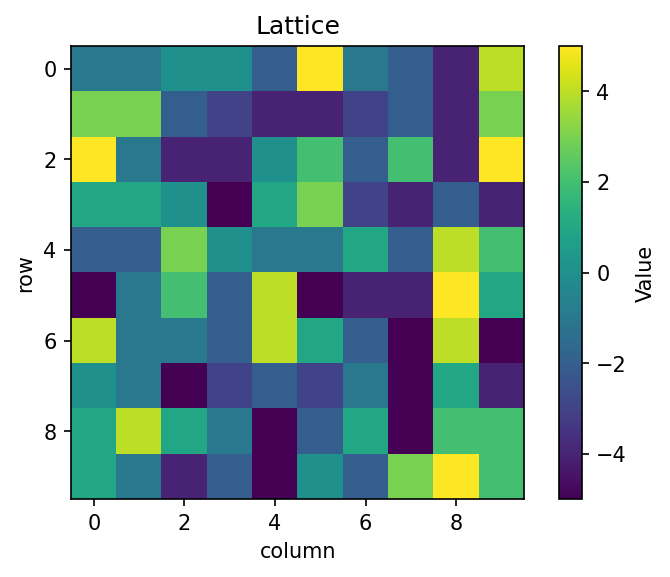

In [359]:
plt.subplots(dpi=150)       # increase the resolution
plt.imshow(lattice, cmap="viridis")     # plot the latice using the colors "viridis"  
plt.colorbar(label="Value")
plt.title("Lattice")
plt.xlabel("column")
plt.ylabel("row")

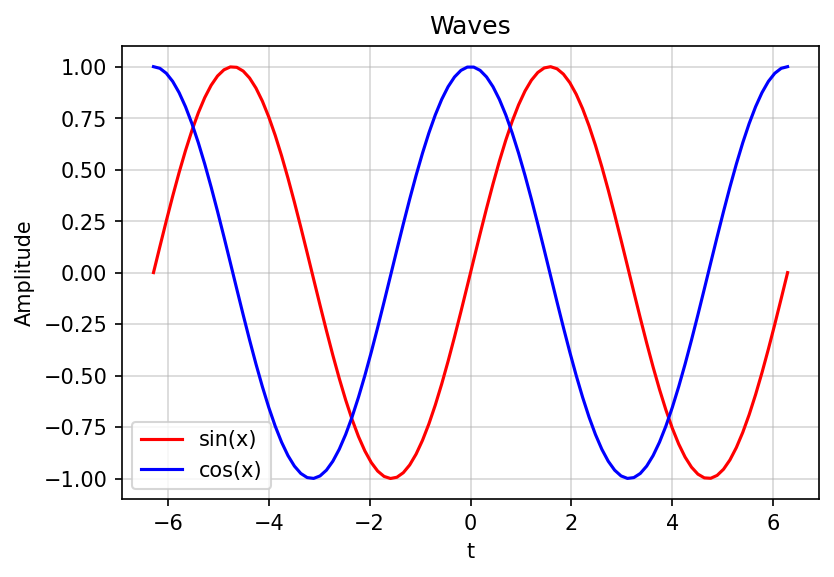

In [337]:
ts = np.linspace(-2*np.pi,2*np.pi,100)          # create array of times
y1s = np.sin(ts)    # evaluate sin at each time
y2s = np.cos(ts)    # evaluate cos at each time
plt.subplots(dpi=150)
plt.plot(ts, y1s, color="red", label="sin(x)")
plt.plot(ts, y2s, color="blue", label="cos(x)")
plt.title("Waves")
plt.xlabel("t")
plt.ylabel("Amplitude")
plt.grid(alpha=0.5)     # add grid
plt.legend()        # add legend with default options

### 3.2. Animations

In [410]:
import celluloid

In [424]:
from IPython.display import HTML

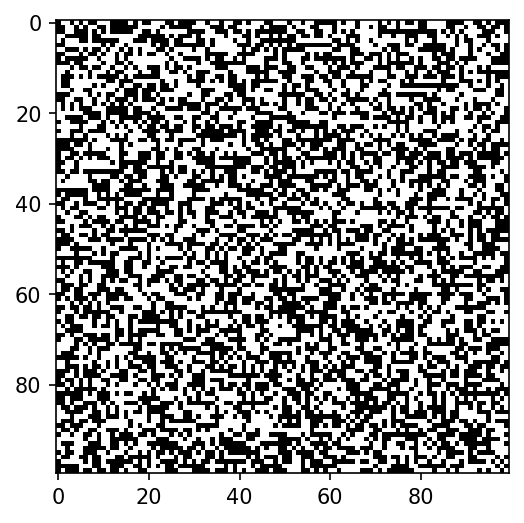

: 

In [ ]:
fig, ax = plt.subplots(figsize=(6,4), dpi=150)
cam = celluloid.Camera(fig)
for i in range(100):
    x = np.random.choice([-1,1], size=(100,100))
    ax.imshow(x, cmap="gray")
    cam.snap()
animation = cam.animate(interval=100)
HTML(animation.to_html5_video())

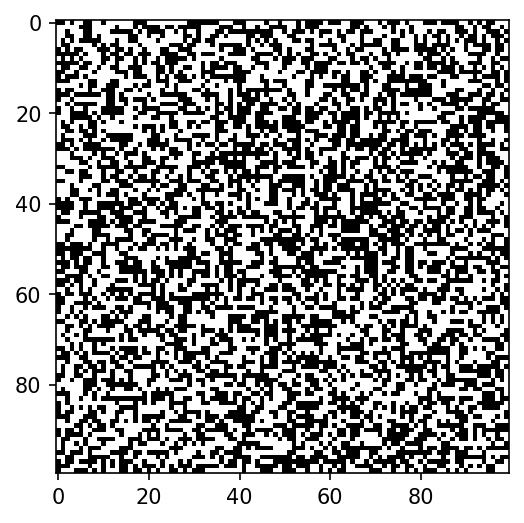

In [ ]:

im = ax.imshow(frames[0], cmap="gray")
def update(i):
    im.set_array(frames[i])
    return [im]
ani = animation.FuncAnimation(fig, update, frames=len(frames), interval=50)

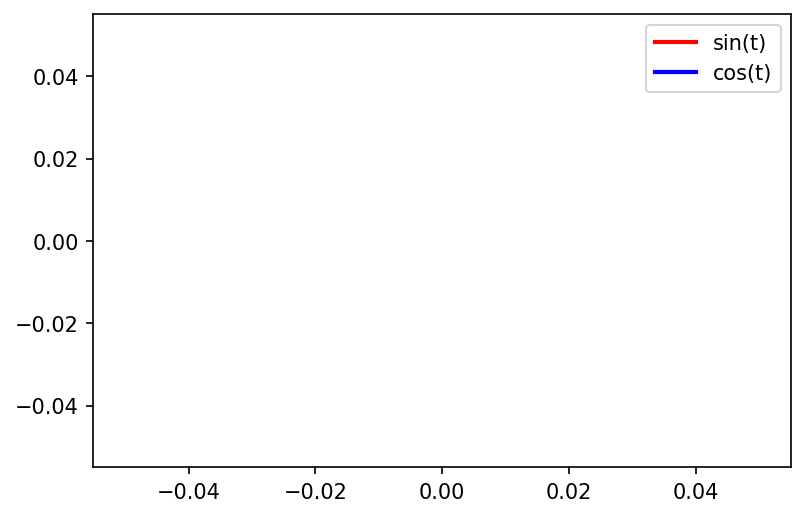

In [ ]:


# we now create the elements of our plot that will be updated during the animation

line1, = ax.plot([], [], color="red", lw=2)     # ax.plot returns a list of 2D line objects
line2, = ax.plot([], [], color="blue", lw=2)
ax.legend(["sin(t)", "cos(t)"])

In [ ]:
def drawframe(n):
    

In [ ]:
animation.FuncAnimation(fig, draw_frame, frames=100, interval=20, blit)